In [ ]:
%env HOME

'/Users/antoines'

In [2]:
import sys
sys.path.append('/Users/antoines')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from make_rough import Fourier_synthesis
from PyCo.Topography import Topography
from PyCo.SolidMechanics import PeriodicFFTElasticHalfSpace
from PyCo.Tools.Optimisation.accelerated_gradient_projection import accelerated_gradient_projection
from PyCo.Tools.Optimisation.ConstrainedConjugateGradientsPy import constrained_conjugate_gradients

In [4]:

nx,ny = 256, 256
sx = float(nx)
sy = float(ny)
dx  = 1. 
dy = 1.

surface, surfaceq = Fourier_synthesis(nx, ny, sx, sy, Hurst=0.8,
                                          rms_height=None,
                                          rms_slope=0.1,
                                          short_cutoff=4*dx,
                                          long_cutoff=sy / 4,
                                          rolloff=1)

topography = Topography(np.asarray(surface), size=(sx,sy))

Creating Fourier representation:
|############################################################| 100% (255/255)
Inverse FFT:
|############################################################| 100% (384/384)


In [5]:
hs = PeriodicFFTElasticHalfSpace((nx,ny), young=1., size=(sx,sy))


Frobenius 480.4467357259007


Text(0, 0.5, 'maximum penetration')

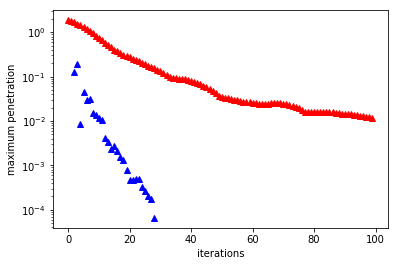

In [6]:
fig, ax = plt.subplots()
ax.set_yscale("log")

def make_callback(lineformat):
    def callback(it, p, d):
        
        #print("maxpen = {} ".format(np.max(-gap)))
        #print(p)
        ax.plot(it, d["max_penetration"] , lineformat)
        
    return callback

p, gap = accelerated_gradient_projection(hs, topography, offset=0,maxiter = 100, callback=make_callback("^r"))
result = constrained_conjugate_gradients(hs, topography, offset=0, maxiter = 100, callback=make_callback("^b"))

ax.set_xlabel("iterations")
ax.set_ylabel("maximum penetration")

plot in term of number of FFTs will be more representative of the computational time

Frobenius 480.4467357259007


Text(0, 0.5, 'maximum penetration')

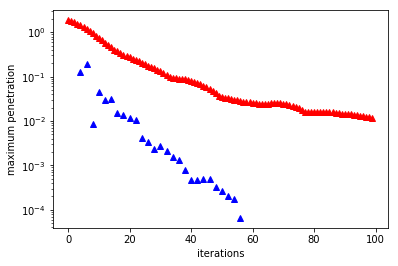

In [7]:
fig, ax = plt.subplots()
ax.set_yscale("log")

def make_callback(lineformat):
    def callback(it, p, d):
        
        #print("maxpen = {} ".format(np.max(-gap)))
        #print(p)
        ax.plot(it, d["max_penetration"] , lineformat)
        
    return callback

p, gap = accelerated_gradient_projection(hs, topography, offset=0,maxiter = 100, callback=make_callback("^r"))
result = constrained_conjugate_gradients(hs, topography, offset=0, maxiter = 100, callback=lambda it, p,d : make_callback("^b")(2* it, p,d))

ax.set_xlabel("iterations")
ax.set_ylabel("maximum penetration")

In [8]:
%timeit accelerated_gradient_projection(hs, topography, offset=0,maxiter = 100)

Frobenius 480.4467357259007
Frobenius 480.4467357259007
Frobenius 480.4467357259007
Frobenius 480.4467357259007
Frobenius 480.4467357259007
Frobenius 480.4467357259007
Frobenius 480.4467357259007
Frobenius 480.4467357259007
281 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit constrained_conjugate_gradients(hs, topography, offset=0, maxiter = 100)

240 ms ± 16.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


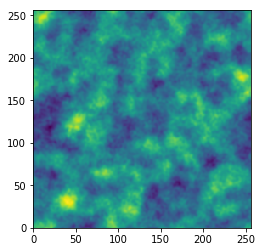

In [10]:
fig, ax = plt.subplots()
ax.set_aspect(1)
ax.pcolormesh(topography.heights())

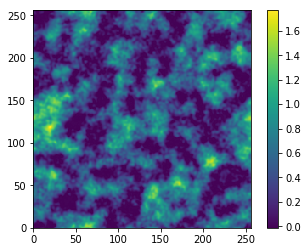

In [11]:
fig, ax = plt.subplots()
ax.set_aspect(1)
plt.colorbar(ax.pcolormesh(gap))

Text(0.5, 1.0, 'pressures')

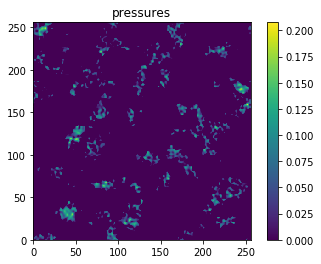

In [12]:
fig, ax = plt.subplots()
ax.set_aspect(1)
plt.colorbar(ax.pcolormesh(p))
ax.set_title("pressures")

probably max penetration is not the correct measure

Frobenius 480.4467357259007


Text(0, 0.5, 'fractional area')

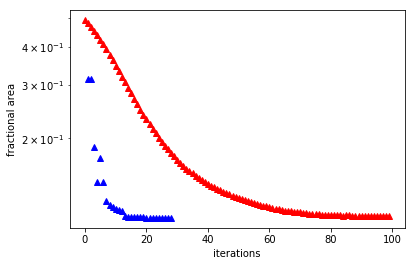

In [13]:
fig, ax = plt.subplots()
ax.set_yscale("log")

def make_callback(lineformat):
    def callback(it, p, d):
        
        #print("maxpen = {} ".format(np.max(-gap)))
        #print(p)
        ax.plot(it, d["fractional_area"] , lineformat)
        
    return callback

p, gap = accelerated_gradient_projection(hs, topography, offset=0,maxiter = 100, callback=make_callback("^r"))
result = constrained_conjugate_gradients(hs, topography, offset=0, maxiter = 100, callback=make_callback("^b"))

ax.set_xlabel("iterations")
ax.set_ylabel("fractional area")

no doesn't look better